In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore')
import io
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

In [2]:
df = pd.read_csv('../Data/cleaned_table.csv')

In [3]:
#plt.figure(figsize = (50,50,))
#sns.set(font_scale = 2)
#sns.heatmap(df.corr(), square = True, annot = True, cmap ='coolwarm',annot_kws={"size": 16})

In [4]:
df1 = df[(df['year'] == 2018)]
df2 = df[(df['year'] == 2019)]
df3 = df[(df['year'] == 2020)]

In [5]:
### We will look at the distribution of delays across airlines. First we will explore which airlines have the most delays
df1['delayed'] = df1['arrdelay'].apply(lambda x:x >0)  #2018
df2['delayed'] = df2['arrdelay'].apply(lambda x:x >0)  #2019
df3['delayed'] = df3['arrdelay'].apply(lambda x:x >0)  #2020

In [6]:
delayed_flights_2019 = df2[(df2['delayed'] == True)]
delayed_flights_2019['airline'].value_counts()

Southwest Airlines Co.     2417
American Airlines Inc.     1883
Delta Air Lines Inc.       1535
SkyWest Airlines Inc.      1464
United Air Lines Inc.      1181
JetBlue Airways             662
Envoy Air                   654
Republic Airline            609
PSA Airlines Inc.           557
Alaska Airlines Inc.        535
Mesa Airlines Inc.          455
Endeavor Air Inc.           371
Spirit Air Lines            363
Frontier Airlines Inc.      289
ExpressJet Airlines LLC     269
Allegiant Air               217
Hawaiian Airlines Inc.      175
Name: airline, dtype: int64

In [7]:
delayed_flights_2020 = df3[(df3['delayed']== True)]
delayed_flights_2020['airline'].value_counts()

Southwest Airlines Co.     370
American Airlines Inc.     326
Delta Air Lines Inc.       264
SkyWest Airlines Inc.      259
United Air Lines Inc.      193
Envoy Air                  144
PSA Airlines Inc.          130
Republic Airline           124
Alaska Airlines Inc.       108
JetBlue Airways             88
Spirit Air Lines            87
Mesa Airlines Inc.          70
Endeavor Air Inc.           69
Frontier Airlines Inc.      50
Allegiant Air               45
ExpressJet Airlines LLC     42
Hawaiian Airlines Inc.      24
Name: airline, dtype: int64

In [8]:
delayed_flights_2020.head()

,year,quarter,month,dayofmonth,dayofweek,flightdate,dot_id_reporting_airline,iata_code_reporting_airline,flight_number_reporting_airline,originairportid,...,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,airline,origincity,destcity,delayed
14,2020,1,3,13,5,13/03/20,20363,9E,5223,13930,...,3,0.0,0.0,0.0,0.0,32.0,Endeavor Air Inc.,Chicago,New York,True
16,2020,1,2,12,3,12/02/20,20363,9E,5044,10397,...,2,0.0,0.0,0.0,0.0,0.0,Endeavor Air Inc.,Atlanta,Evansville,True
46,2020,1,2,3,1,03/02/20,20363,9E,5370,11423,...,1,29.0,0.0,0.0,0.0,0.0,Endeavor Air Inc.,Des Moines,Minneapolis,True
56,2020,1,3,6,5,06/03/20,20363,9E,5082,11267,...,3,0.0,0.0,23.0,0.0,0.0,Endeavor Air Inc.,Dayton,Minneapolis,True
70,2020,1,2,11,2,11/02/20,20363,9E,4872,11433,...,1,0.0,0.0,0.0,0.0,0.0,Endeavor Air Inc.,Detroit,Traverse City,True


In [9]:
delayed_by_carrier1 = df1.groupby(['airline', 'delayed']).size().unstack().reset_index()
delayed_by_carrier2 = df2.groupby(['airline', 'delayed']).size().unstack().reset_index()
delayed_by_carrier3 = df3.groupby(['airline', 'delayed']).size().unstack().reset_index()

In [10]:
delayed_by_carrier1['flight_count'] = (delayed_by_carrier1[False] + delayed_by_carrier1[True])
delayed_by_carrier2['flight_count'] = (delayed_by_carrier2[False] + delayed_by_carrier2[True])
delayed_by_carrier3['flight_count'] = (delayed_by_carrier3[False] + delayed_by_carrier3[True])

Proportion delay in 2018

In [11]:
### Calculate the proportion delay
delayed_by_carrier1['proportion_delayed'] = delayed_by_carrier1[True] / delayed_by_carrier1['flight_count']
delayed_by_carrier1 = delayed_by_carrier1.sort_values('proportion_delayed', ascending= False)

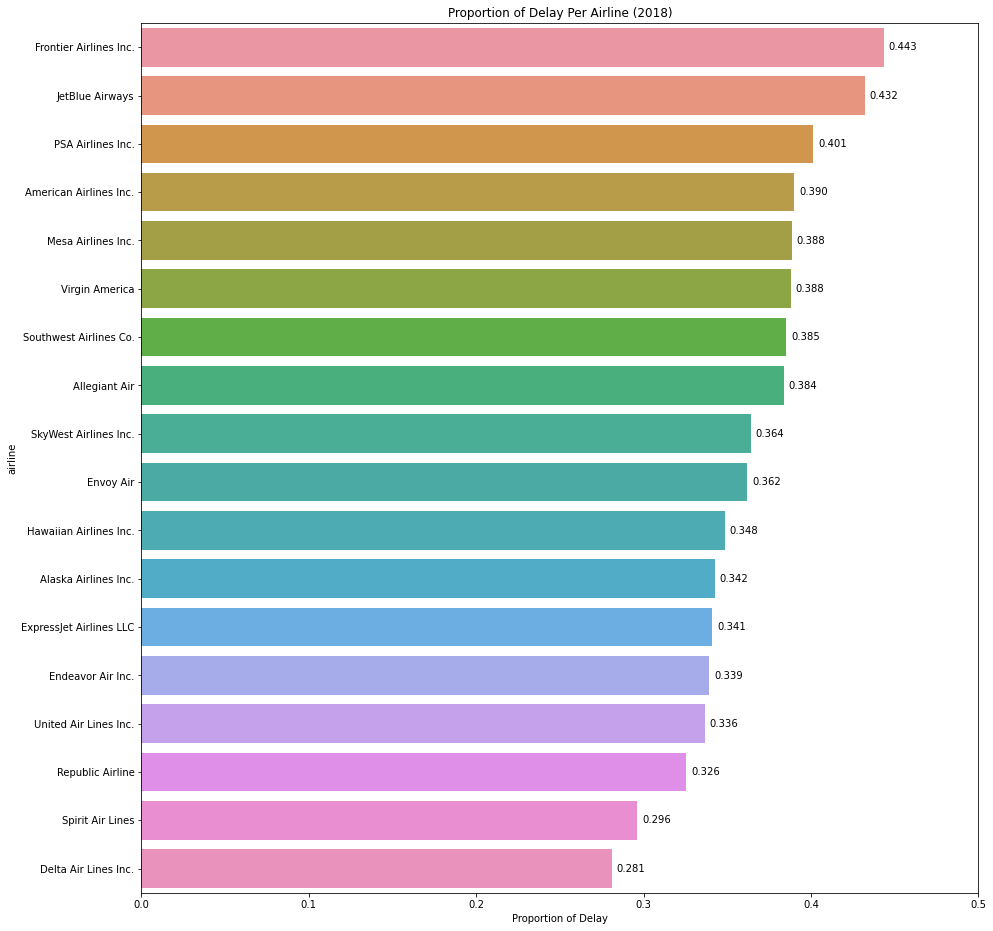

In [12]:
plt.figure(figsize = (15,16))
ax = sns.barplot(x = delayed_by_carrier1['proportion_delayed'], y = delayed_by_carrier1['airline'])
plt.xlabel('Proportion of Delay')
ax.set_title('Proportion of Delay Per Airline (2018)') 
ax.set_xlim(0,.5)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. 
    space = 5

    # Vertical alignment.
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.3f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

Proportion delay in 2019

In [13]:
delayed_by_carrier2['proportion_delayed'] = delayed_by_carrier2[True] / delayed_by_carrier2['flight_count']
delayed_by_carrier2 = delayed_by_carrier2.sort_values('proportion_delayed', ascending= False)

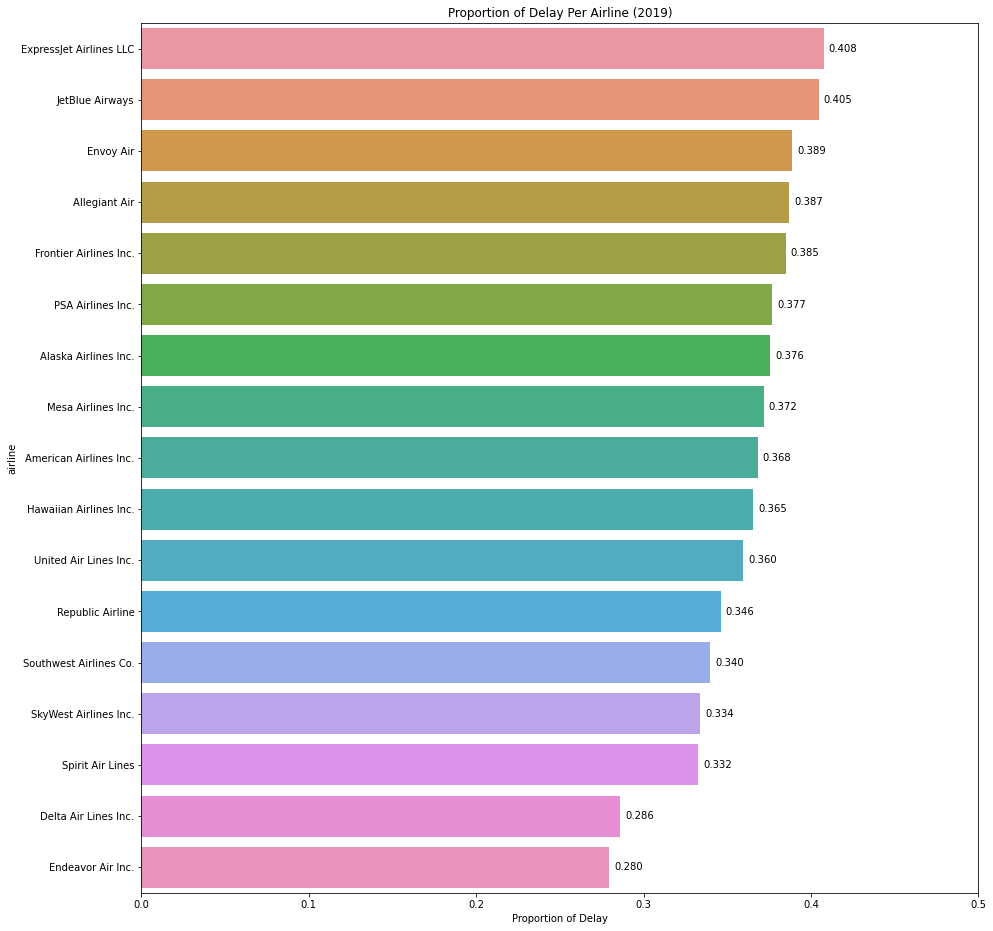

In [14]:
plt.figure(figsize = (15,16))
ax = sns.barplot(x = delayed_by_carrier2['proportion_delayed'], y = delayed_by_carrier2['airline'])
plt.xlabel('Proportion of Delay')
ax.set_title('Proportion of Delay Per Airline (2019)') 
ax.set_xlim(0,.5)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. 
    space = 5

    # Vertical alignment.
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.3f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

Proportion Delay in 2020

In [15]:
delayed_by_carrier3['proportion_delayed'] = delayed_by_carrier3[True] / delayed_by_carrier3['flight_count']
delayed_by_carrier3 = delayed_by_carrier3.sort_values('proportion_delayed', ascending= False)

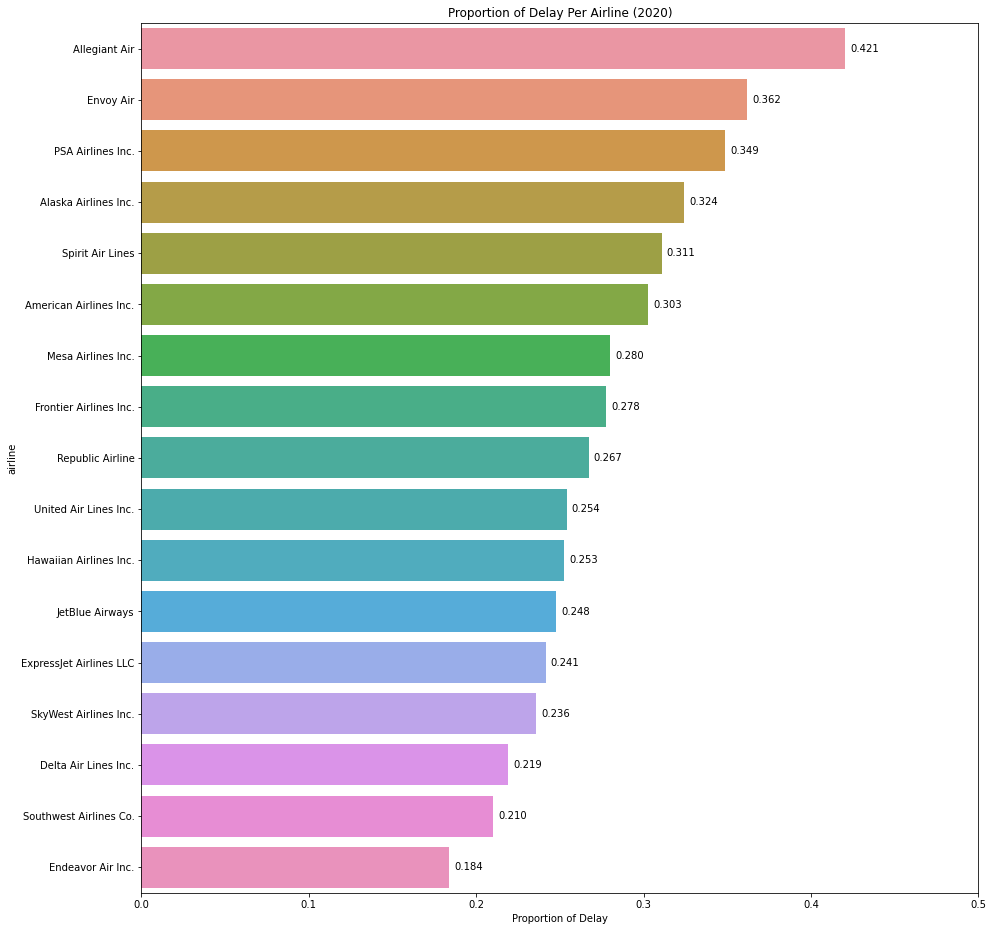

In [16]:
plt.figure(figsize = (15,16))
ax = sns.barplot(x = delayed_by_carrier3['proportion_delayed'], y = delayed_by_carrier3['airline'])
plt.xlabel('Proportion of Delay')
ax.set_title('Proportion of Delay Per Airline (2020)') 
ax.set_xlim(0,.5)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. 
    space = 5

    # Vertical alignment.
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.3f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.


In [17]:
delayed_by_carrier3['proportion_delayed'] = delayed_by_carrier3[True] / delayed_by_carrier3['flight_count']
delayed_by_carrier3 = delayed_by_carrier3.sort_values('proportion_delayed', ascending= False)

## Do visual for each airline delay

In [18]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statistical infos on each airline:
global_stats1 = df1['arrdelay'].groupby(df1['airline']).apply(get_stats).unstack()
global_stats1 = global_stats1.sort_values('count')
global_stats1

,min,max,count,mean
airline,,,,
Virgin America,-63.0,162.0,98.0,4.306122
Allegiant Air,-51.0,744.0,477.0,11.088050
Hawaiian Airlines Inc.,-44.0,254.0,485.0,0.812371
Frontier Airlines Inc.,-48.0,443.0,591.0,14.993232
Spirit Air Lines,-55.0,364.0,942.0,1.556263
ExpressJet Airlines LLC,-49.0,1134.0,1035.0,9.404831
Mesa Airlines Inc.,-43.0,931.0,1125.0,10.014222
Endeavor Air Inc.,-49.0,676.0,1200.0,4.266667
Alaska Airlines Inc.,-62.0,312.0,1311.0,-1.984744


In [19]:
global_stats2 = df2['arrdelay'].groupby(df2['airline']).apply(get_stats).unstack()
global_stats2 = global_stats2.sort_values('count')
global_stats2

,min,max,count,mean
airline,,,,
Hawaiian Airlines Inc.,-90.0,425.0,479.0,0.977035
Allegiant Air,-55.0,872.0,561.0,9.918004
ExpressJet Airlines LLC,-46.0,944.0,660.0,14.746970
Frontier Airlines Inc.,-50.0,634.0,751.0,7.929427
Spirit Air Lines,-50.0,751.0,1092.0,3.999084
Mesa Airlines Inc.,-39.0,1458.0,1224.0,14.053105
Endeavor Air Inc.,-47.0,997.0,1327.0,5.107008
Alaska Airlines Inc.,-59.0,783.0,1424.0,2.053371
PSA Airlines Inc.,-50.0,699.0,1479.0,9.182556


In [20]:
global_stats3 = df3['arrdelay'].groupby(df3['airline']).apply(get_stats).unstack()
global_stats3 = global_stats3.sort_values('count')
global_stats3

,min,max,count,mean
airline,,,,
Hawaiian Airlines Inc.,-41.0,77.0,95.0,-3.421053
Allegiant Air,-39.0,293.0,107.0,8.018692
ExpressJet Airlines LLC,-47.0,169.0,174.0,-4.655172
Frontier Airlines Inc.,-53.0,153.0,180.0,-3.733333
Mesa Airlines Inc.,-43.0,186.0,250.0,-1.424000
Spirit Air Lines,-44.0,578.0,280.0,4.435714
Alaska Airlines Inc.,-45.0,218.0,333.0,-3.561562
JetBlue Airways,-54.0,266.0,355.0,-5.340845
PSA Airlines Inc.,-56.0,976.0,373.0,10.179625


In [21]:
abbr_companies = df.set_index('iata_code_reporting_airline')['airline'].to_dict()
abbr_companies

{'9E': 'Endeavor Air Inc.',
 'WN': 'Southwest Airlines Co.',
 'YV': 'Mesa Airlines Inc.',
 'YX': 'Republic Airline',
 'OH': 'PSA Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'DL': 'Delta Air Lines Inc.',
 'OO': 'SkyWest Airlines Inc.',
 'AA': 'American Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'G4': 'Allegiant Air',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'Envoy Air',
 'EV': 'ExpressJet Airlines LLC',
 'VX': 'Virgin America'}

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


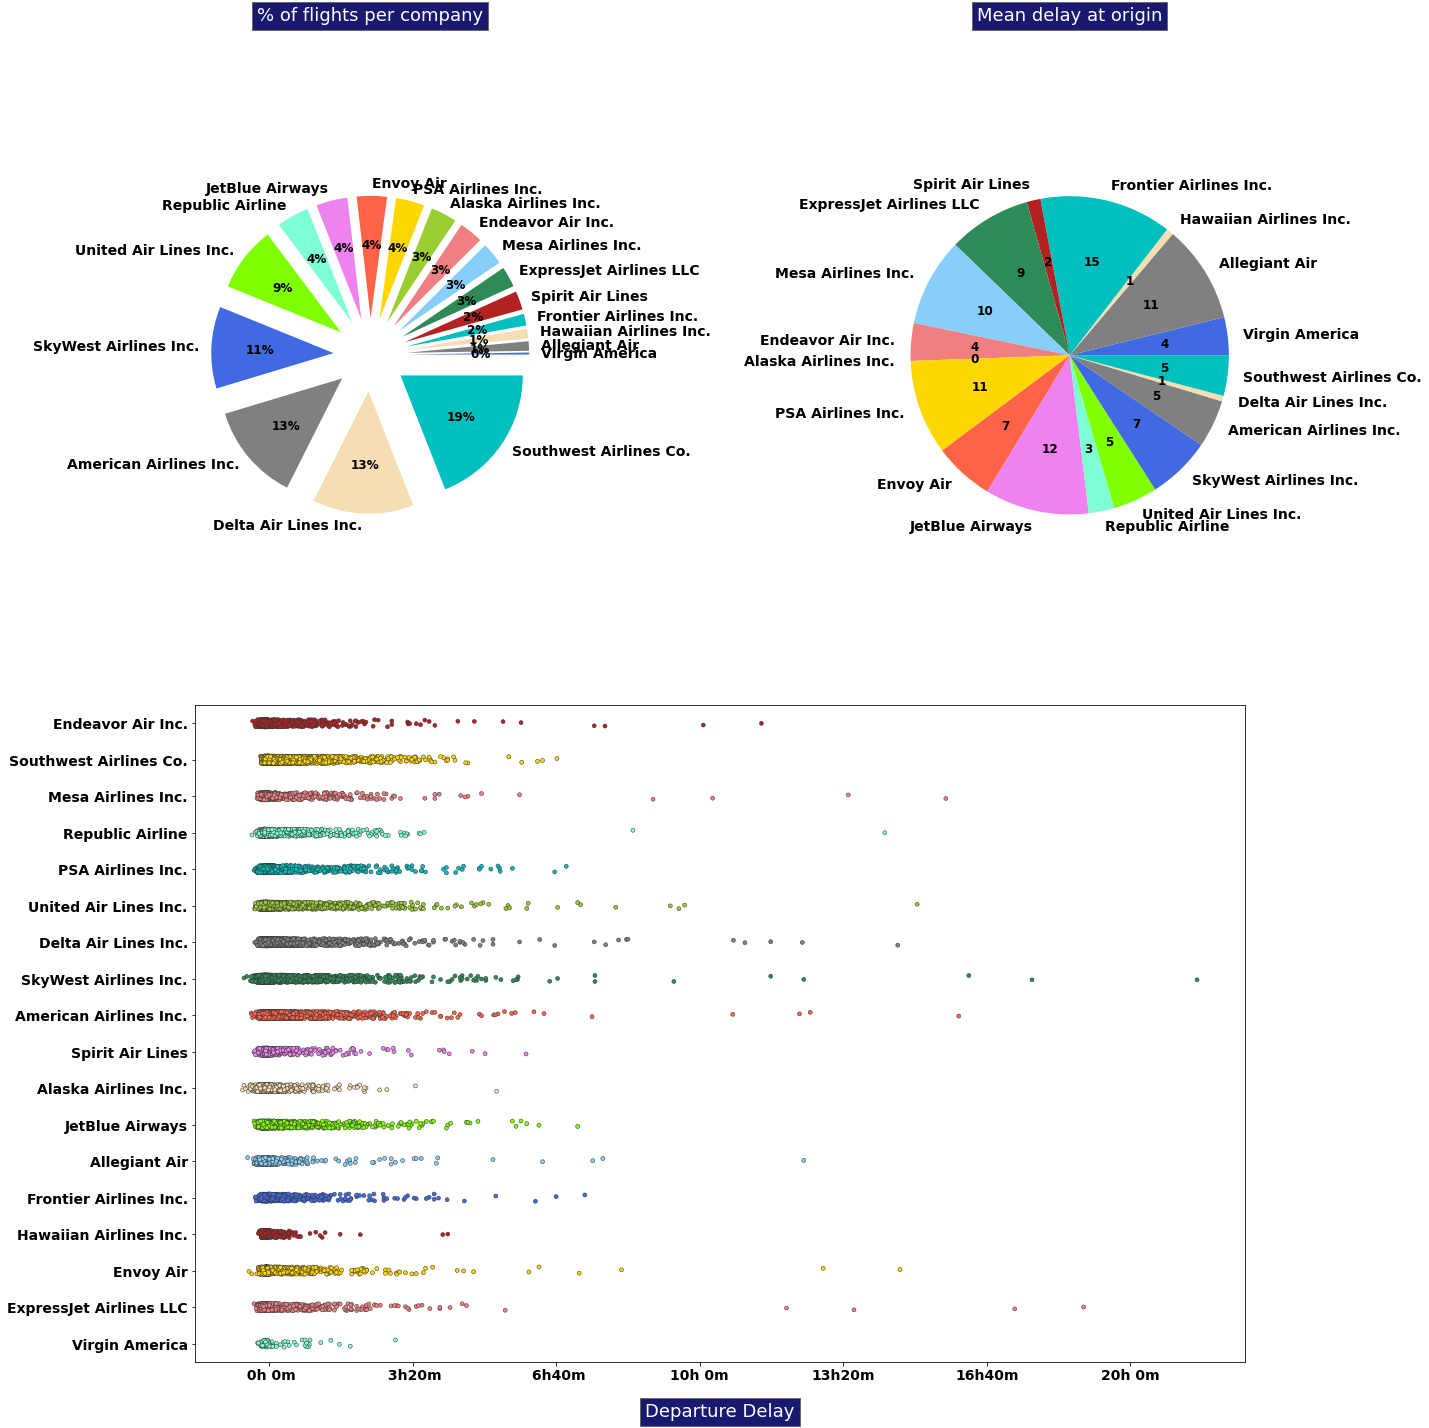

In [22]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 12}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df1_delay = df1.loc[:, ['airline', 'depdelay']]
df1_delay['airline'] = df1['airline'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(20,20))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 

#Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats1.index]
sizes  = global_stats1['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#----------------------------------------
#Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats1['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                              colors = colors, shadow=False, startangle=0,
                              autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="airline", x="depdelay", size = 4, palette = colors,
                    data=df1, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure Delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

In [23]:
#originairportid	
print('Number of airport:{}'.format(len(df1['origincity'].unique())))

Number of airport:324


In [24]:
origin_airport = dict()
for carrier in abbr_companies.keys():
  list_origin_airport = df1[df1['airline'] == carrier]['origincity'].unique()
  origin_airport[carrier] = len(list_origin_airport)

In [25]:
origin_airport[carrier]

0

test_df = pd.DataFrame.from_dict(origin_airport, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()

In [26]:
dist = df1.groupby('flights').agg({'distance':[np.max, np.min]})
np.sum(dist['distance']['amax'] - dist['distance']['amin']) == 0

False

In [27]:
weekdays = [u"Mon", u"Tue", u"Wed", u"Thu", u"Fr", u"Sat", u"Sun"]
months = [u"Jan", u"Feb", u"Mar", u"Apr", u"May", u"Jun", u"Jul", u"Aug", u"Sep", u"Oct", u"Nov", u"Dec"]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


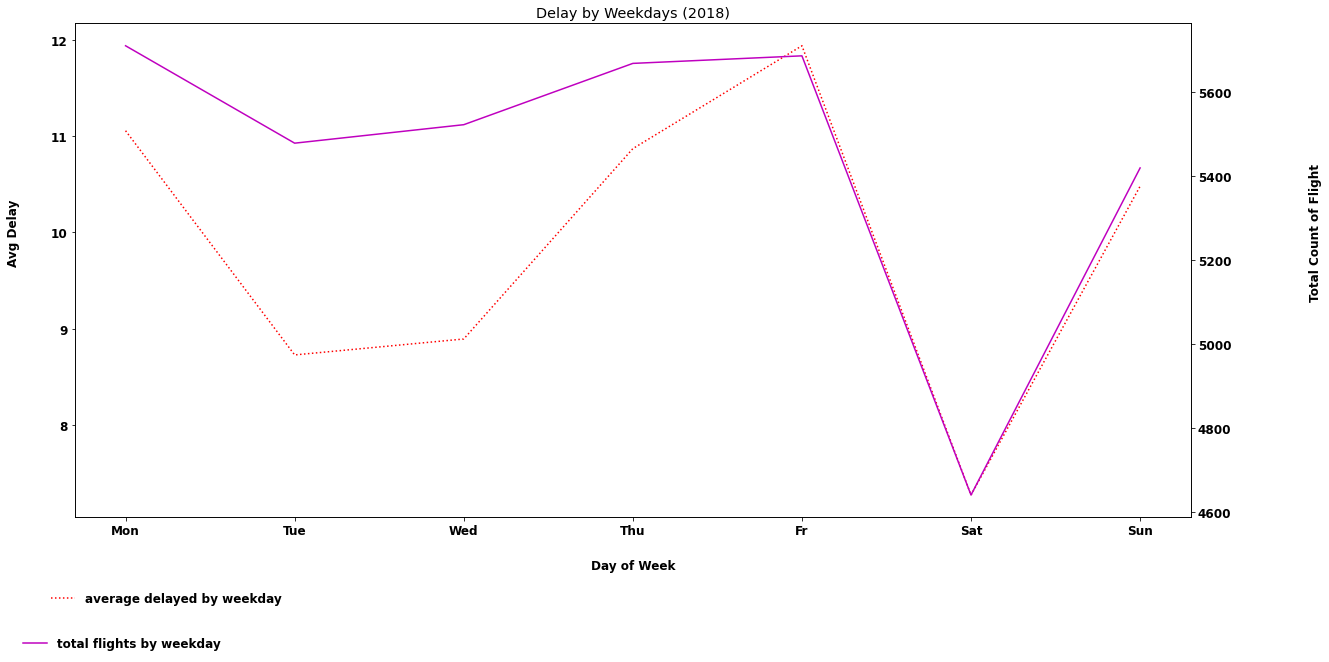

In [28]:
plt.figure(figsize=(20,20))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,8), df1.groupby("dayofweek").agg({"depdelay": np.mean}), 'k:', color='r')
line.set_label("average delayed by weekday")
ax0.legend(bbox_to_anchor=(.195, -0.13), frameon = False)

line2, = ax1.plot(range(1,8), list(df1["dayofweek"].value_counts().sort_index()), color='m')
line2.set_label("total flights by weekday")
ax1.legend(bbox_to_anchor=(.14, -0.22), frameon = False)

ax0.text(4, 6.5, 'Day of Week', ha='center')
ax0.text(0.3, 10, 'Avg Delay', va='center', rotation='vertical')
ax0.text(8,10, 'Total Count of Flight', va='center', rotation='vertical')
plt.title(u"Delay by Weekdays (2018)")
plt.xticks(range(1,8), weekdays)
plt.show()

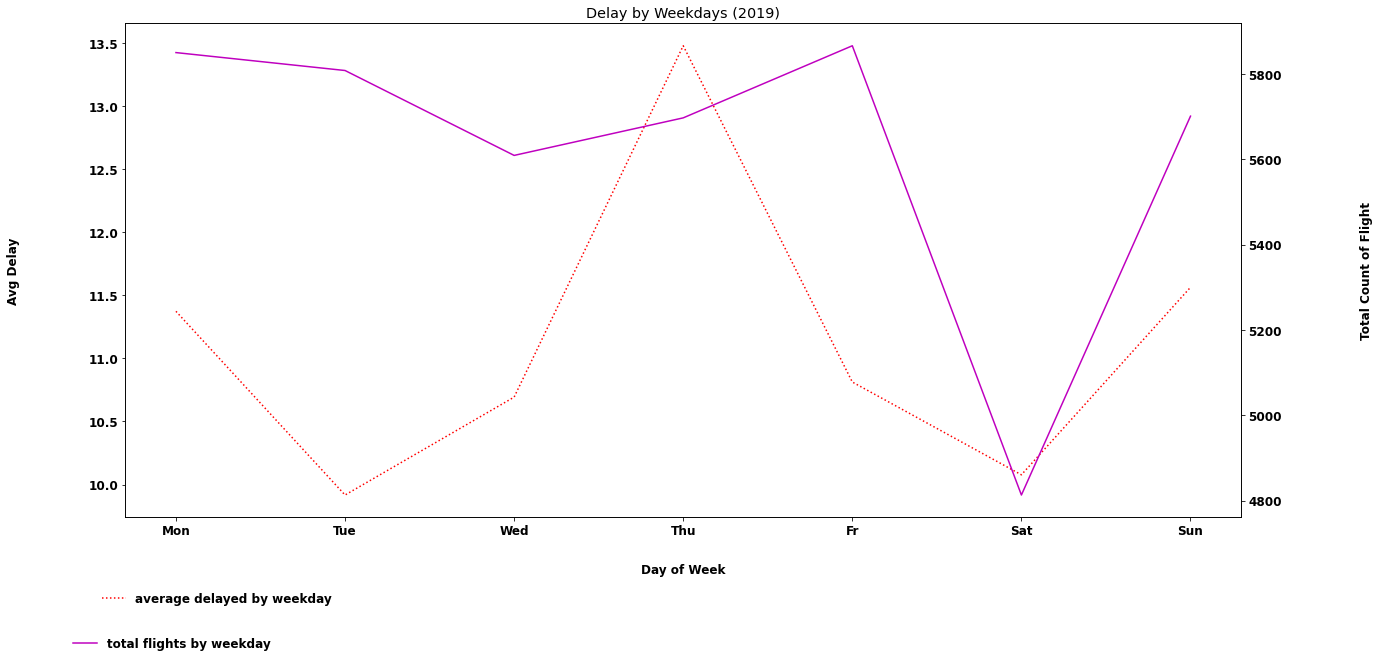

In [29]:
plt.figure(figsize=(20,20))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,8), df2.groupby("dayofweek").agg({"depdelay": np.mean}), 'k:', color='r')
line.set_label("average delayed by weekday")
ax0.legend(bbox_to_anchor=(.195, -0.13), frameon = False)

line2, = ax1.plot(range(1,8), list(df2["dayofweek"].value_counts().sort_index()), color='m')
line2.set_label("total flights by weekday")
ax1.legend(bbox_to_anchor=(.14, -0.22), frameon = False)

ax0.text(4, 9.3, 'Day of Week', ha='center')
ax0.text(0.002, 11.7, 'Avg Delay', va='center', rotation='vertical')
ax0.text(8,11.7, 'Total Count of Flight', va='center', rotation='vertical')
plt.title(u"Delay by Weekdays (2019)")
plt.xticks(range(1,8), weekdays)
plt.show()


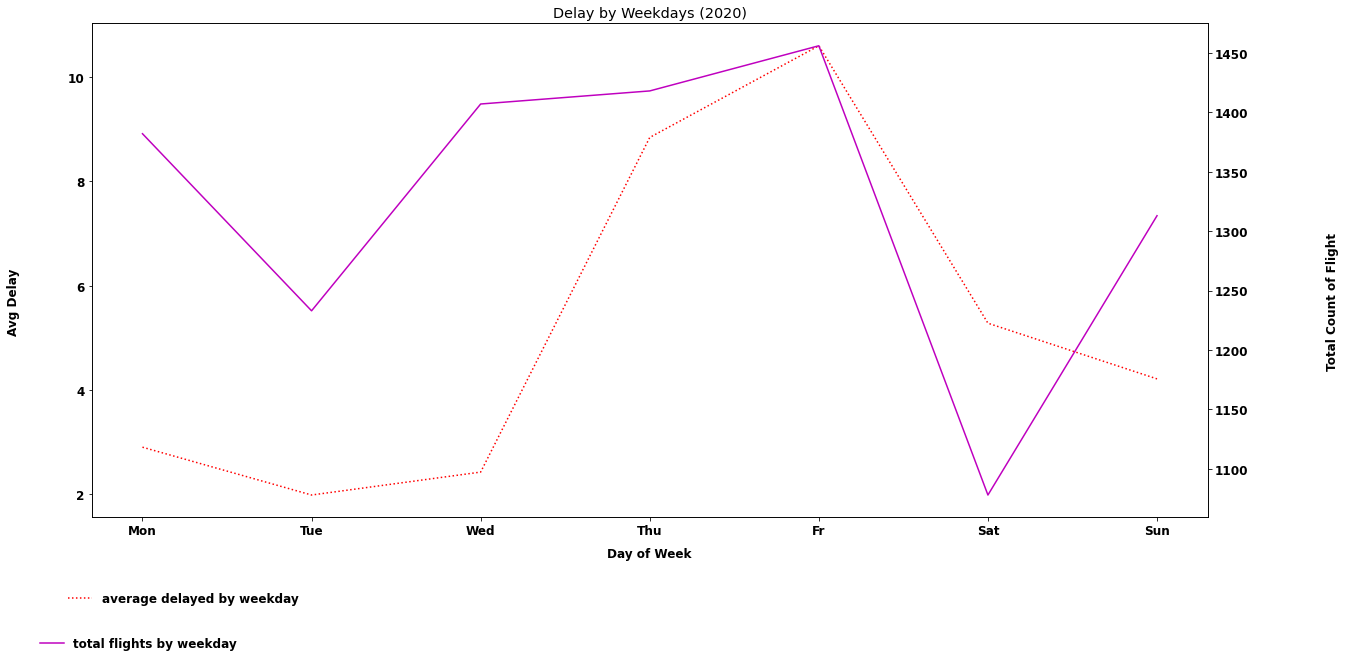

In [30]:
plt.figure(figsize=(20,20))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,8), df3.groupby("dayofweek").agg({"depdelay": np.mean}), 'k:', color='r')
line.set_label("average delayed by weekday")
ax0.legend(bbox_to_anchor=(.195, -0.13), frameon = False)

line2, = ax1.plot(range(1,8), list(df3["dayofweek"].value_counts().sort_index()), color='m')
line2.set_label("total flights by weekday")
ax1.legend(bbox_to_anchor=(.14, -0.22), frameon = False)

ax0.text(4, 0.8, 'Day of Week', ha='center')
ax0.text(0.2, 5.7, 'Avg Delay', va='center', rotation='vertical')
ax0.text(8,5.7, 'Total Count of Flight', va='center', rotation='vertical')
plt.title(u"Delay by Weekdays (2020)")
plt.xticks(range(1,8), weekdays)
plt.show()

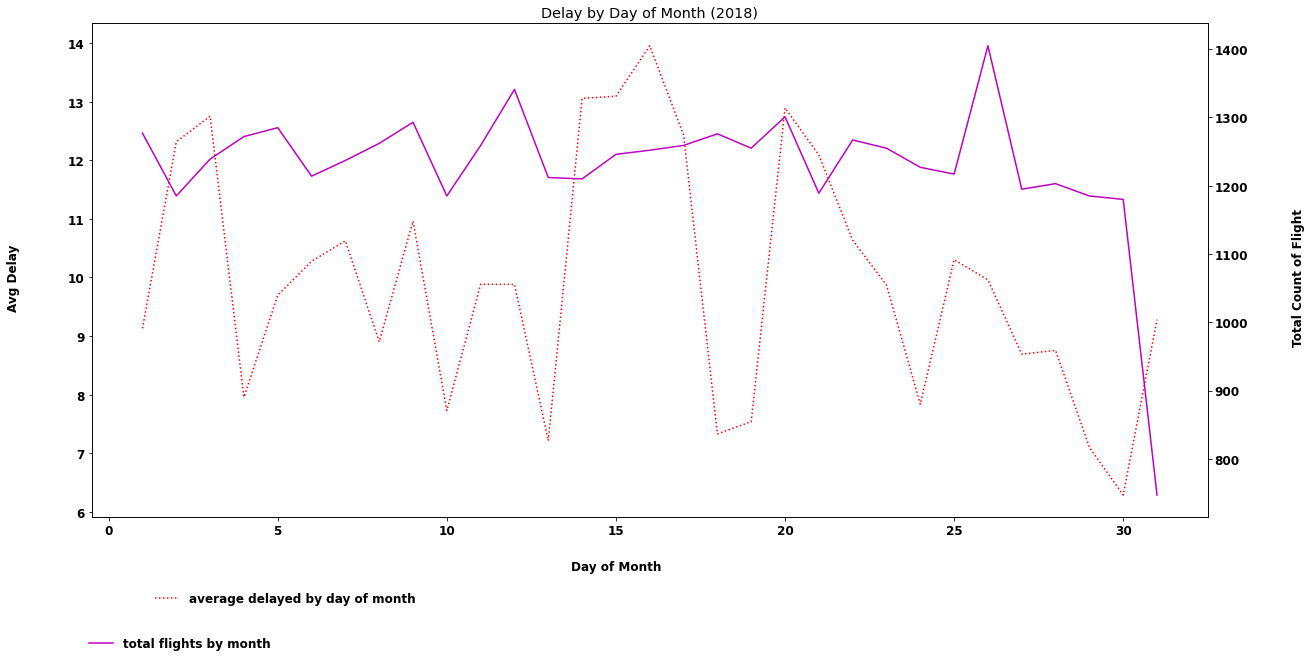

In [31]:
plt.figure(figsize=(20,20))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,32), df1.groupby("dayofmonth").agg({"depdelay": np.mean}), 'k:', color='r')
line.set_label("average delayed by day of month")
ax0.legend(bbox_to_anchor=(.3, -0.13), frameon = False)

line2, = ax1.plot(range(1,32), list(df1["dayofmonth"].value_counts().sort_index()), color='m')
line2.set_label("total flights by month")
ax1.legend(bbox_to_anchor=(.17, -0.22), frameon = False)

ax0.text(15, 5, 'Day of Month', ha='center')
ax0.text(-3, 10, 'Avg Delay', va='center', rotation='vertical')
ax0.text(35,10, 'Total Count of Flight', va='center', rotation='vertical')
plt.title(u"Delay by Day of Month (2018)")
plt.show()

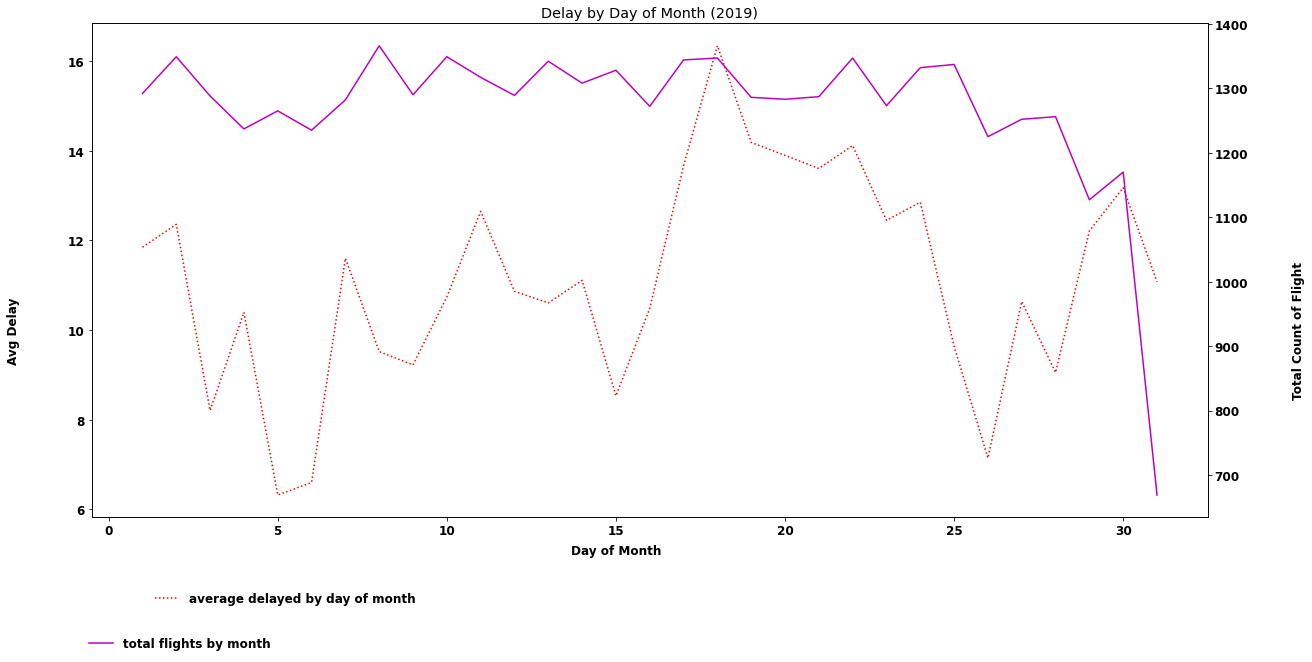

In [32]:
plt.figure(figsize=(20,20))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,32), df2.groupby("dayofmonth").agg({"depdelay": np.mean}), 'k:', color='r')
line.set_label("average delayed by day of month")
ax0.legend(bbox_to_anchor=(.3, -0.13), frameon = False)

line2, = ax1.plot(range(1,32), list(df2["dayofmonth"].value_counts().sort_index()), color='m')
line2.set_label("total flights by month")
ax1.legend(bbox_to_anchor=(.17, -0.22), frameon = False)

ax0.text(15, 5, 'Day of Month', ha='center')
ax0.text(-3, 10, 'Avg Delay', va='center', rotation='vertical')
ax0.text(35,10, 'Total Count of Flight', va='center', rotation='vertical')
plt.title(u"Delay by Day of Month (2019)")
plt.show()

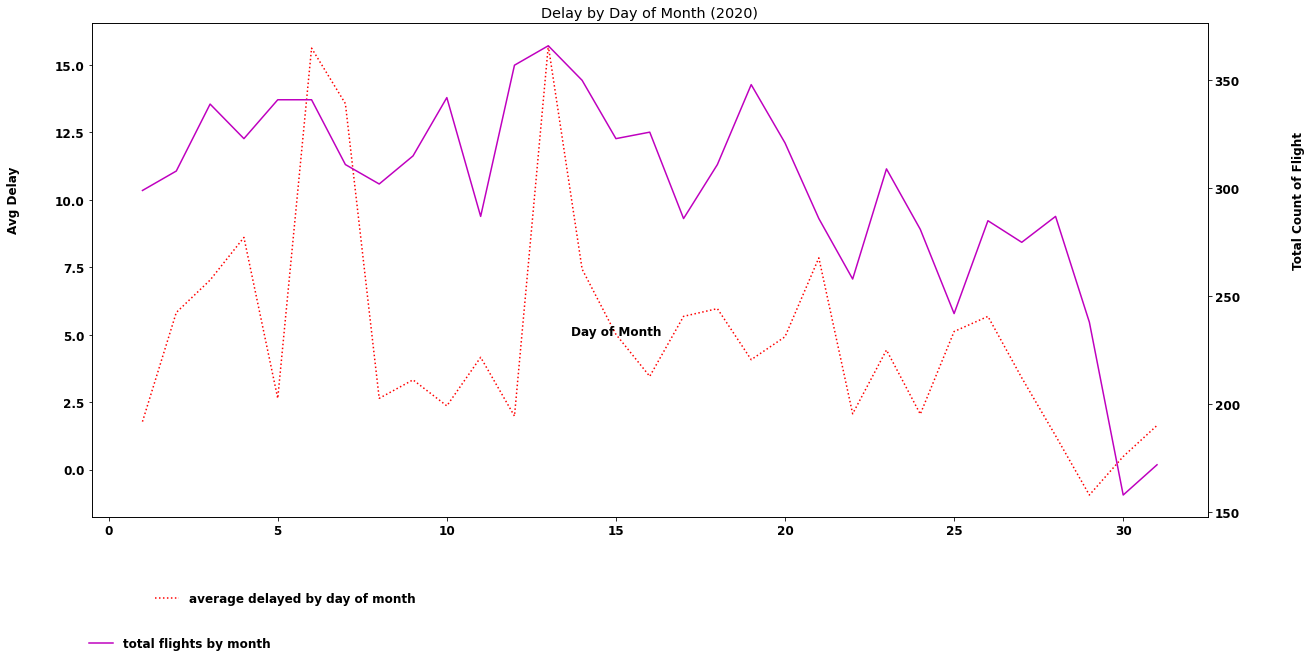

In [33]:
plt.figure(figsize=(20,20))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,32), df3.groupby("dayofmonth").agg({"depdelay": np.mean}), 'k:', color='r')
line.set_label("average delayed by day of month")
ax0.legend(bbox_to_anchor=(.3, -0.13), frameon = False)

line2, = ax1.plot(range(1,32), list(df3["dayofmonth"].value_counts().sort_index()), color='m')
line2.set_label("total flights by month")
ax1.legend(bbox_to_anchor=(.17, -0.22), frameon = False)

ax0.text(15, 5, 'Day of Month', ha='center')
ax0.text(-3, 10, 'Avg Delay', va='center', rotation='vertical')
ax0.text(35,10, 'Total Count of Flight', va='center', rotation='vertical')
plt.title(u"Delay by Day of Month (2020)")
plt.show()

## Now let's look if distance has any effect on delay. For this we will take the whole dateframe of all 3 years. 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


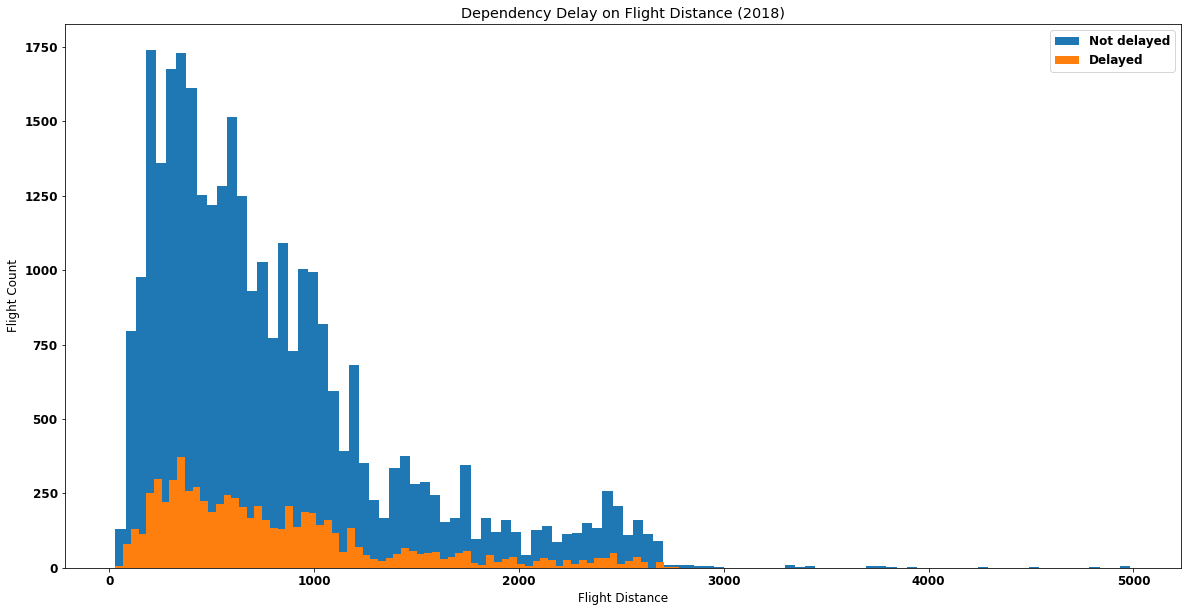

In [34]:
plt.figure(figsize=(20,10))
plt.hist(df1['distance'][df1['depdel15'] == 0], bins=100, label="Not delayed")
plt.hist(df1['distance'][df1['depdel15'] == 1], bins=100, label="Delayed")
plt.title(u"Dependency Delay on Flight Distance (2018)")
plt.xlabel(u"Flight Distance")
plt.ylabel(u"Flight Count")
plt.legend()
plt.show()

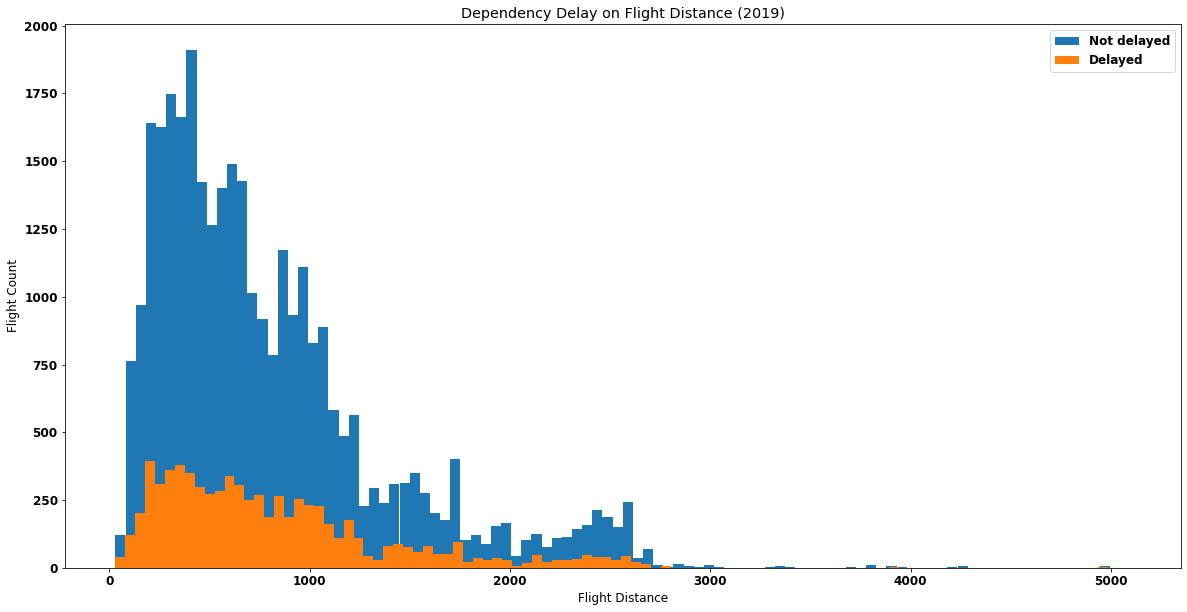

In [35]:
plt.figure(figsize=(20,10))
plt.hist(df2['distance'][df2['depdel15'] == 0], bins=100, label="Not delayed")
plt.hist(df2['distance'][df2['depdel15'] == 1], bins=100, label="Delayed")
plt.title(u"Dependency Delay on Flight Distance (2019)")
plt.xlabel(u"Flight Distance")
plt.ylabel(u"Flight Count")
plt.legend()
plt.show()

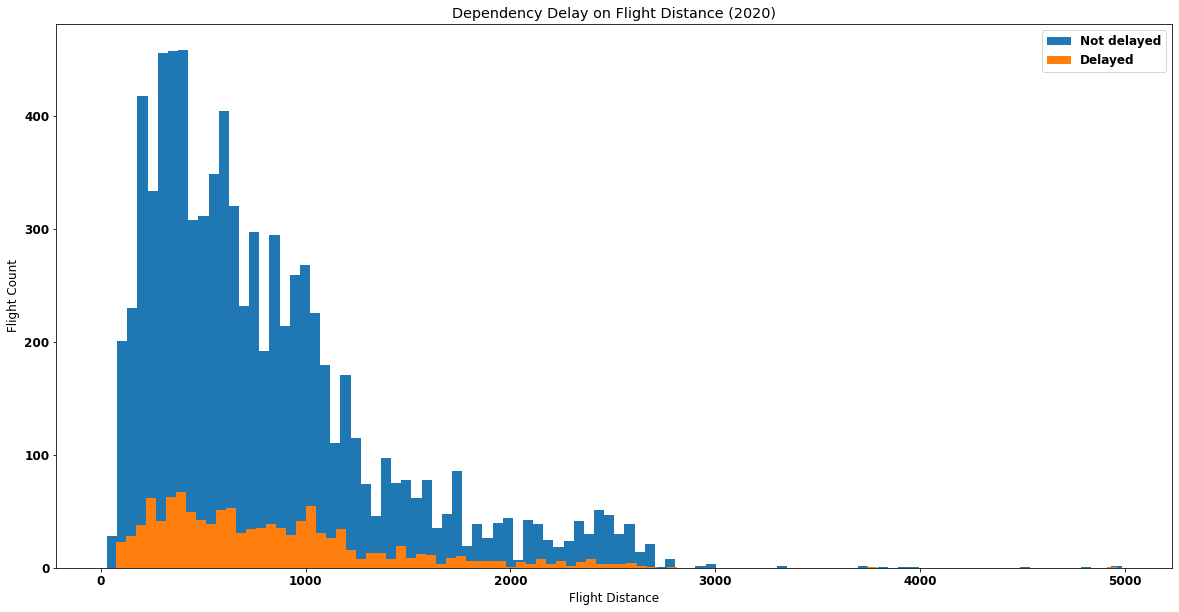

In [36]:
plt.figure(figsize=(20,10))
plt.hist(df3['distance'][df3['depdel15'] == 0], bins=100, label="Not delayed")
plt.hist(df3['distance'][df3['depdel15'] == 1], bins=100, label="Delayed")
plt.title(u"Dependency Delay on Flight Distance (2020)")
plt.xlabel(u"Flight Distance")
plt.ylabel(u"Flight Count")
plt.legend()
plt.show()

In [37]:
df = df.drop(columns = ['dot_id_reporting_airline', 'iata_code_reporting_airline', 'originairportseqid', 'origincitymarketid',
                        'originstatefips','originwac', 'originstatename','origincity','arrtimeblk','depdelay', 'arrivaldelaygroups',
                        'deststatename', 'deptime', 'depdelayminutes', 'depdel15', 'departuredelaygroups', 'destairportseqid','taxiout', 'wheelsoff',
                        'wheelson','taxiin', 'arrtime', 'arrdelay', 'arrdelayminutes',
                        'actualelapsedtime','carrierdelay','weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'])

In [38]:
df.head()

,year,quarter,month,dayofmonth,dayofweek,flightdate,flight_number_reporting_airline,originairportid,destairportid,destcitymarketid,...,crsdeptime,crsarrtime,arrdel15,crselapsedtime,airtime,flights,distance,distancegroup,airline,destcity
0,2019,2,6,11,2,11/06/19,3459,10397,10868,30868,...,1950,2057,1.0,67.0,35.0,1,192,1,Endeavor Air Inc.,Columbia
1,2018,2,4,10,2,10/04/18,5198,10397,12197,31703,...,928,1150,0.0,142.0,99.0,1,780,4,Endeavor Air Inc.,White Plains
2,2019,4,10,1,2,01/10/19,3358,12953,11057,31057,...,1910,2130,1.0,140.0,76.0,1,544,3,Endeavor Air Inc.,Charlotte
3,2018,3,7,27,5,27/07/18,5388,10821,14492,34492,...,1526,1636,1.0,70.0,46.0,1,255,2,Endeavor Air Inc.,Raleigh/Durham
4,2019,1,3,4,1,04/03/19,5179,14122,12478,31703,...,604,745,1.0,101.0,63.0,1,340,2,Endeavor Air Inc.,New York


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86761 entries, 0 to 86760
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             86761 non-null  int64  
 1   quarter                          86761 non-null  int64  
 2   month                            86761 non-null  int64  
 3   dayofmonth                       86761 non-null  int64  
 4   dayofweek                        86761 non-null  int64  
 5   flightdate                       86761 non-null  object 
 6   flight_number_reporting_airline  86761 non-null  int64  
 7   originairportid                  86761 non-null  int64  
 8   destairportid                    86761 non-null  int64  
 9   destcitymarketid                 86761 non-null  int64  
 10  destwac                          86761 non-null  int64  
 11  crsdeptime                       86761 non-null  int64  
 12  crsarrtime        

In [40]:
#df['destcity'].unique(

In [41]:
#pd.options.display.max_rows = 345
#df.groupby('destcity')['arrivaldelaygroups'].agg(['mean', 'count', 'median']).sort_values(by = 'mean')

In [42]:
df.to_csv('../Data/final_table.csv')